#                                         Negassi Tesfay
##                                                 Airbnb Data Challenge



## Exploratroy Data Analysis

### Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr
pd.set_option("display.max_columns", 999)
sns.set_style("white")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Color vector tableau 20 , combination or red, green and blue set into vector of 20 colors.
Source: http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/

In [3]:
colors = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
 
tableau_20 = [(c[0] / 255.0, c[1] / 255.0, c[2] / 255.0) for c in colors]

### Load data - Cleaned data from Data Wrangling

In [4]:
# Cleaned data from Data wrangling
df= pd.read_csv('clean_listings.csv')

### Jointplot graph
This is a bivariate graphing tool, and will enable us to see how price and availability are distributed jointly. This shows they are badly correlated.


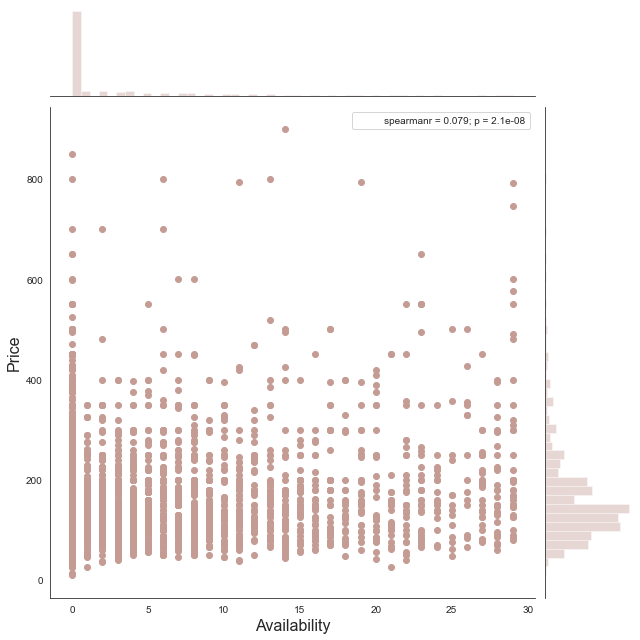

In [5]:
df_s = df.sample(5000)
h=sns.jointplot(x='availability_30', y='price',data=df_s, color=tableau_20[11],height=9,stat_func=spearmanr);
h.set_axis_labels('Availability', 'Price', fontsize=16)

plt.tight_layout()

### Boxplots <br> 

This will show how categorical variables 'property type' and 'room type' are related to price and availability. we can see different price and availability statistics for different categories of property and room types<br>

- property type has a long list and will by truncated by merging the less frequent values to one and assign a value 'other'


In [6]:
g=df.groupby("property_type")
df.loc[g["property_type"].transform(lambda x: len(x) < 280).astype(bool), "property_type"] = 'Other'

In [7]:
(df.groupby("property_type").count()['id']).sort_values(ascending=False)


property_type
Apartment            9794
Other                1100
House                1030
Townhouse             430
Bed and breakfast     325
Name: id, dtype: int64

In [8]:
(df.groupby("property_type").count()['id']).sort_values(ascending=False).index

Index(['Apartment', 'Other', 'House', 'Townhouse', 'Bed and breakfast'], dtype='object', name='property_type')

[Text(0, 0, 'Private Rooom'),
 Text(0, 0, 'Entire Room'),
 Text(0, 0, 'Shared Room')]

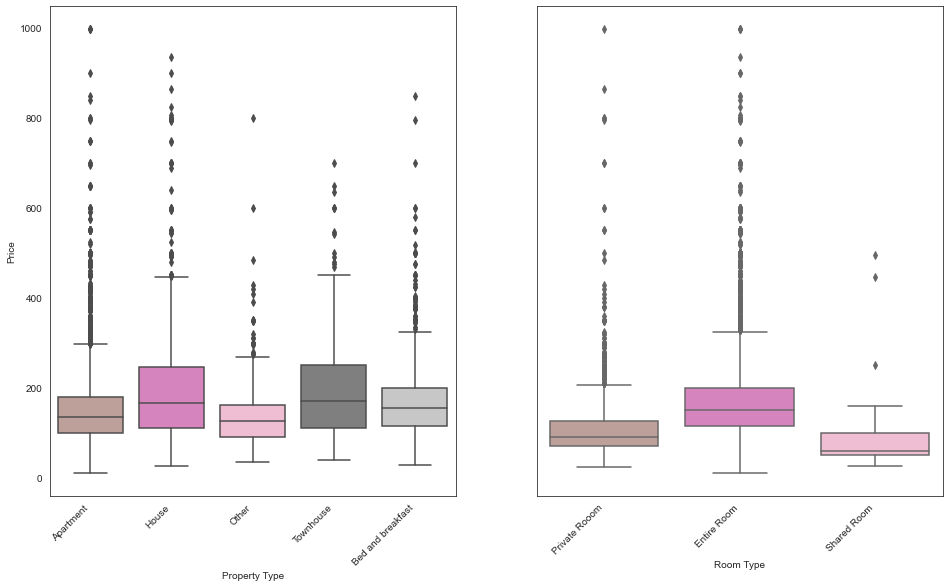

In [9]:
fig, ax =plt.subplots(1,2, sharey=True,figsize=(16,9))

sns.boxplot(x='property_type', y='price', data=df, ax=ax[0],palette=tableau_20[11:19])
sns.boxplot(x='room_type', y='price', data=df, ax=ax[1],palette=tableau_20[11:14])
ax[0].set( ylabel='Price')
ax[1].set( ylabel='')
ax[0].set( xlabel='Property Type')
ax[1].set( xlabel='Room Type')
prop_labels = ['Apartment', 'House', 'Other', 'Townhouse', 'Bed and breakfast', 'Loft','Boat', 'Condominium']
room_labels=['Private Rooom','Entire Room','Shared Room']
ax[0].set_xticklabels(prop_labels, rotation=45, ha='right')
ax[1].set_xticklabels(room_labels, rotation=45, ha='right')

[Text(0, 0, 'Private Rooom'),
 Text(0, 0, 'Entire Room'),
 Text(0, 0, 'Shared Room')]

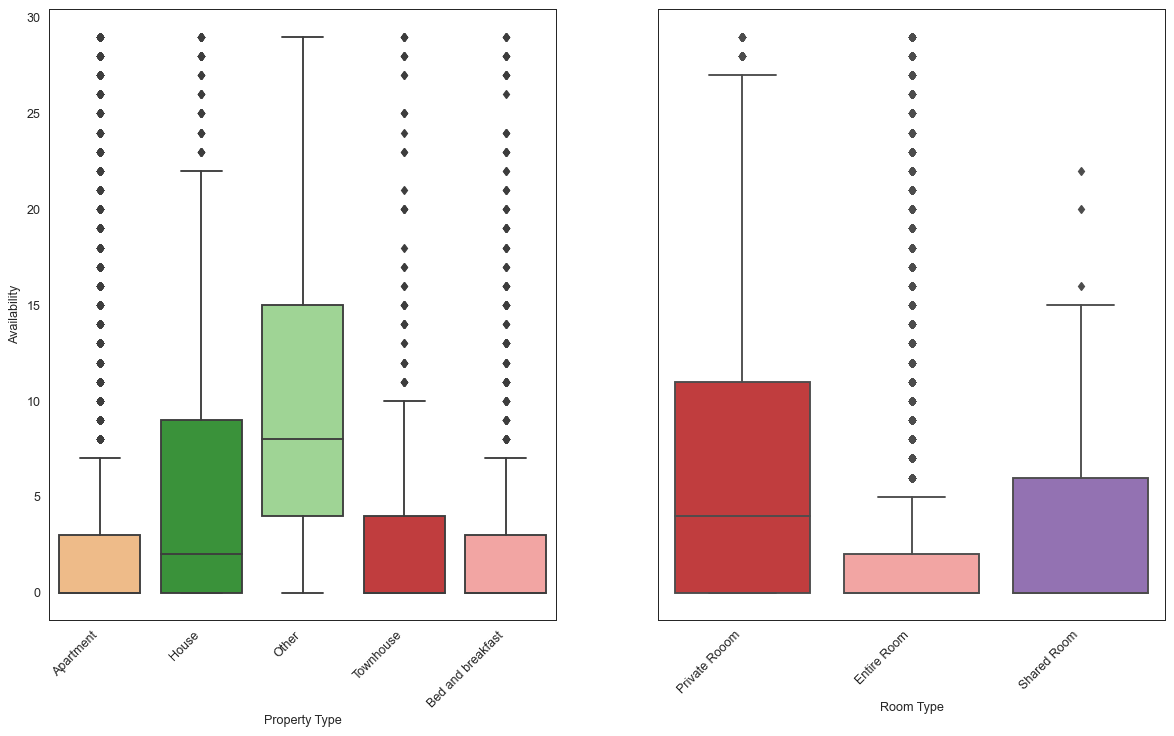

In [10]:
fig, ax =plt.subplots(1,2, sharey=True,figsize=(16,9),dpi=90)

sns.boxplot(x='property_type', y='availability_30', data=df, ax=ax[0],palette=tableau_20[3:11])
sns.boxplot(x='room_type', y='availability_30', data=df, ax=ax[1],palette=tableau_20[6:9])
ax[0].set( ylabel='Availability')
ax[1].set( ylabel='')
ax[0].set( xlabel='Property Type')
ax[1].set( xlabel='Room Type')
prop_labels = ['Apartment', 'House', 'Other', 'Townhouse', 'Bed and breakfast', 'Loft','Boat', 'Condominium']
room_labels=['Private Rooom','Entire Room','Shared Room']
ax[0].set_xticklabels(prop_labels, rotation=45, ha='right')
ax[1].set_xticklabels(room_labels, rotation=45, ha='right')

### Distribution plot <br>
A distribution of price and availability can be displayed with different categories of cancellation policy as follows. Price and availbility for different categories of cancellation policies.


In [11]:
(df.groupby("cancellation_policy").count()['id']).sort_values(ascending=False)

cancellation_policy
strict_14_with_grace_period    5626
moderate                       4997
flexible                       1991
super_strict_60                  50
super_strict_30                  15
Name: id, dtype: int64

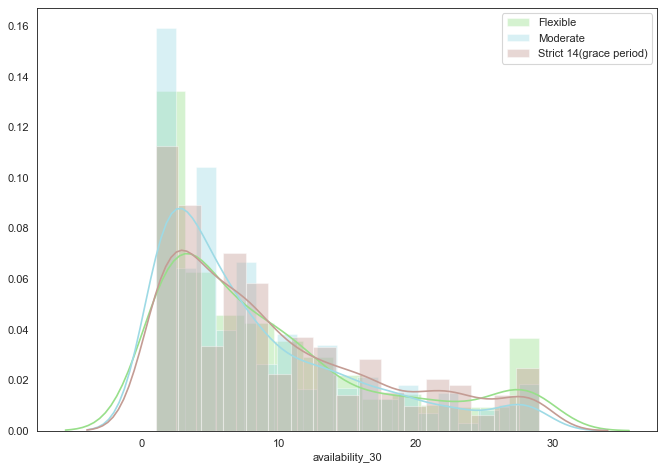

In [12]:
avilable=df.query('availability_30 !=0')
x1 = avilable.query("cancellation_policy == 'flexible'")['availability_30']
x2 = avilable.query("cancellation_policy == 'moderate'")['availability_30']
x3 = avilable.query("cancellation_policy == 'strict_14_with_grace_period'")['availability_30']
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1,color=tableau_20[5],label='Flexible')
sns.distplot(x2,color=tableau_20[19],label='Moderate')
sns.distplot(x3,color=tableau_20[11],label='Strict 14(grace period)')
plt.legend();

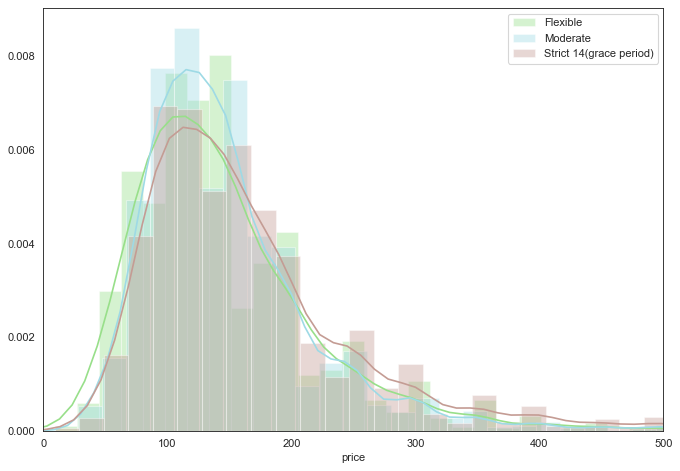

In [13]:
avilable=df.query('price !=0')
x1 = avilable.query("cancellation_policy == 'flexible'")['price']
x2 = avilable.query("cancellation_policy == 'moderate'")['price']
x3 = avilable.query("cancellation_policy == 'strict_14_with_grace_period'")['price']
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1,color=tableau_20[5],label='Flexible')
sns.distplot(x2,color=tableau_20[19],label='Moderate')
sns.distplot(x3,color=tableau_20[11],label='Strict 14(grace period)')
plt.xlim(0,500)
plt.legend();